In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('input/train.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
#Changing pandas options to show all columns
pd.set_option('display.max_columns', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [5]:
df.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

**There are no null values in the dataset**

In [6]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
df['Urine protein'].unique()

array([1, 3, 2, 4, 5, 6], dtype=int64)

In [8]:
df['Urine protein'].value_counts()

1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: Urine protein, dtype: int64

In [9]:
df['serum creatinine'].value_counts().sort_index()

0.1       17
0.2        3
0.3        5
0.4      311
0.5     2624
0.6    11153
0.7    19782
0.8    29802
0.9    35776
1.0    31313
1.1    17830
1.2     7657
1.3     2123
1.4      604
1.5      137
1.6       58
1.7       11
1.8       15
1.9       12
2.0        7
2.1        4
2.2        3
2.5        3
3.0        1
3.4        1
5.9        2
7.4        1
9.9        1
Name: serum creatinine, dtype: int64

<Axes: xlabel='serum creatinine', ylabel='Count'>

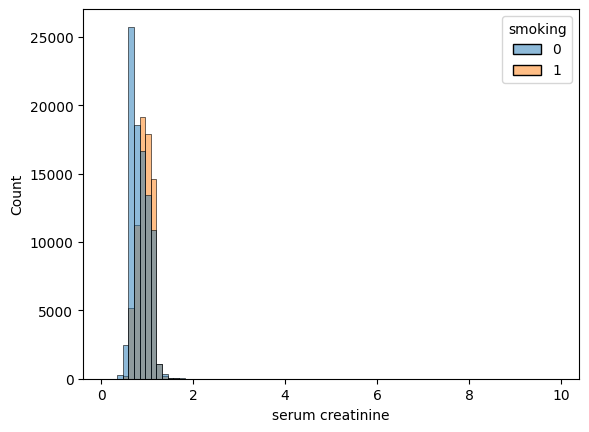

In [10]:
# plot historgram shows the distribution of "serum creatinine" for both somokers and non-smokers

sns.histplot(data=df, x="serum creatinine", hue="smoking", bins=80)

### Machine Learning

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(['id', 'smoking'], axis=1)
y = df.smoking

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Apply minmax scaler on the training data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
# import xgb
import xgboost

model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7806193374739813

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

knn_pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())
                    ])
knn_score = cross_val_score(knn_pipeline, X, y, cv=5, scoring='roc_auc').mean()

lr_pipeline = Pipeline([('scaler', MinMaxScaler()),
                        ('lr', LogisticRegression(max_iter=100000000, penalty='l2'))
                    ])
lr_score = cross_val_score(lr_pipeline, X, y, cv=5, scoring='roc_auc').mean()

xgb_pipeline = Pipeline([('scaler', MinMaxScaler()),
                     ('xgb', XGBClassifier())
                    ])
xgb_score = cross_val_score(xgb_pipeline, X, y, cv=5, scoring='roc_auc').mean()

rf_pipeline = Pipeline([('scaler', MinMaxScaler()),
                        ('rf', RandomForestClassifier())
                        ])
rf_score = cross_val_score(rf_pipeline, X, y, cv=5, scoring='roc_auc').mean()

In [34]:
print(f'KNN Score: {knn_score}')
print(f'xgb_score: {xgb_score}')
print(f'Random Forest Score: {rf_score}')
print(f'Logistic Regression Score: {lr_score}')

KNN Score: 0.7934008512301528
xgb_score: 0.864707530090762
Random Forest Score: 0.8567244775406323
Logistic Regression Score: 0.8329304653744025


***From the initial scores for each model without any hyperparameter tuning, I will exclude the **KNN** model as it has the least score with high difference.***

In [38]:
# try different scalers and test if it has effect on the model performance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
models = [XGBClassifier(), RandomForestClassifier()]

for model in models:
    for scaler in scalers:
        pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])
        scores = cross_val_score(pipeline, X, y, cv=10, scoring='roc_auc')
        print(f"{model.__class__.__name__} Model with {scaler.__class__.__name__} Scaler: {scores.mean()}")

XGBClassifier Model with StandardScaler Scaler: 0.8660968564280976
XGBClassifier Model with MinMaxScaler Scaler: 0.8660968564280976
XGBClassifier Model with RobustScaler Scaler: 0.8660968564280976
RandomForestClassifier Model with StandardScaler Scaler: 0.8570630005265558
RandomForestClassifier Model with MinMaxScaler Scaler: 0.8569084429866015
RandomForestClassifier Model with RobustScaler Scaler: 0.8571405813969513


***All the scalers giving the same roc_auc score, This confirms that scaling the data has no effect on XGBoost models, and Small effect on Random Forest Classifier***

In [ ]:
# try different scalers and test if it has effect on the model performance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
models = [LogisticRegression(max_iter=10000000000)]

for model in models:
    for scaler in scalers:
        pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])
        scores = cross_val_score(pipeline, X, y, cv=10, scoring='roc_auc')
        print(f"{model.__class__.__name__} Model with {scaler.__class__.__name__} Scaler: {scores.mean()}")